# Pandas

Data can be used from [here](http://seanlahman.com/)

In [35]:
!uv pip install -q -U pandas

In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.DataFrame(
    {"c1": [1, 2, 3], "c2": [4, 5, 6], "c3": [7, 8, 9]}, index=["r1", "r2", "r3"]
)

print("{}\n".format(df))

first_two_rows = df[0:2] # Only the first two rows are returned excluding the last row (indexed 2)
print("{}\n".format(first_two_rows))

last_two_rows = df["r2":"r3"] # All rows from r2 to r3 are returned including r3
print("{}\n".format(last_two_rows))

# There will be a KeyError when we uncomment the line 13 and run again
# df['r1'] # Directly accessing a row by its index is not allowed as it is not a column name

# Accessing a row by its label using the loc method
row1 = df.loc["r1"]
print(f"Row1 = \n{row1}")

# Accessing a row by its index using the iloc method
row1 = df.iloc[0]
print(f"\nRow1 using index = \n{row1}")

    c1  c2  c3
r1   1   4   7
r2   2   5   8
r3   3   6   9

    c1  c2  c3
r1   1   4   7
r2   2   5   8

    c1  c2  c3
r2   2   5   8
r3   3   6   9

Row1 = 
c1    1
c2    4
c3    7
Name: r1, dtype: int64

Row1 using index = 
c1    1
c2    4
c3    7
Name: r1, dtype: int64


## Using Loc

In [38]:
df = pd.DataFrame(
    {"c1": [1, 2, 3], "c2": [4, 5, 6], "c3": [7, 8, 9]}, index=["r1", "r2", "r3"]
)

print("{}\n".format(df))

print("{}\n".format(df.loc["r2"]))

bool_list = [False, True, True]
print("{}\n".format(df.loc[bool_list]))

single_val = df.loc["r1", "c2"]
print("Single val: {}\n".format(single_val))

print("{}\n".format(df.loc[["r1", "r3"], "c2"]))

df.loc[["r1", "r3"], "c2"] = 0
print("{}\n".format(df))


# Setting a value
df.loc[["r1", "r3"], "c2"] = 12
print(f"\n{df=}")

    c1  c2  c3
r1   1   4   7
r2   2   5   8
r3   3   6   9

c1    2
c2    5
c3    8
Name: r2, dtype: int64

    c1  c2  c3
r2   2   5   8
r3   3   6   9

Single val: 4

r1    4
r3    6
Name: c2, dtype: int64

    c1  c2  c3
r1   1   0   7
r2   2   5   8
r3   3   0   9


df=    c1  c2  c3
r1   1  12   7
r2   2   5   8
r3   3  12   9


## Groupby

In [39]:
# Create the DataFrame
data = {
    'yearID': [2017, 2015, 2016, 2015, 2016, 2016, 2015, 2017, 2017],
    'teamID': ['CLE', 'CLE', 'BOS', 'DET', 'DET', 'CLE', 'BOS', 'BOS', 'DET'],
    'H': [1449, 1395, 1598, 1515, 1476, 1435, 1495, 1461, 1435],
    'R': [818, 669, 878, 689, 750, 777, 748, 785, 735]
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
# df_new.to_csv('team_stats.csv', index=False)

print(df)

   yearID teamID     H    R
0    2017    CLE  1449  818
1    2015    CLE  1395  669
2    2016    BOS  1598  878
3    2015    DET  1515  689
4    2016    DET  1476  750
5    2016    CLE  1435  777
6    2015    BOS  1495  748
7    2017    BOS  1461  785
8    2017    DET  1435  735


In [40]:
groups = df.groupby("yearID")
for name, group in groups:
    print("Year: {}".format(name))
    print("{}\n".format(group))

print("{}\n".format(groups.get_group(2016)))
print(f"{groups[['H', 'R']].sum()}\n")
print(f"{groups[['H', 'R']].mean()}\n")

Year: 2015
   yearID teamID     H    R
1    2015    CLE  1395  669
3    2015    DET  1515  689
6    2015    BOS  1495  748

Year: 2016
   yearID teamID     H    R
2    2016    BOS  1598  878
4    2016    DET  1476  750
5    2016    CLE  1435  777

Year: 2017
   yearID teamID     H    R
0    2017    CLE  1449  818
7    2017    BOS  1461  785
8    2017    DET  1435  735

   yearID teamID     H    R
2    2016    BOS  1598  878
4    2016    DET  1476  750
5    2016    CLE  1435  777

           H     R
yearID            
2015    4405  2106
2016    4509  2405
2017    4345  2338

                  H           R
yearID                         
2015    1468.333333  702.000000
2016    1503.000000  801.666667
2017    1448.333333  779.333333



In [41]:
no2015 = groups.filter(lambda x: x.name > 2015)
print(no2015)

   yearID teamID     H    R
0    2017    CLE  1449  818
2    2016    BOS  1598  878
4    2016    DET  1476  750
5    2016    CLE  1435  777
7    2017    BOS  1461  785
8    2017    DET  1435  735


## isna / notna

In [42]:
df = pd.DataFrame(
    {
        "playerID": ["bettsmo01", "canoro01", "doejo01"],
        "yearID": [2016, 2016, 2017],
        "teamID": ["BOS", "SEA", np.nan],
        "HR": [31, 39, 99],
    }
)

print("{}\n".format(df))

isna = df["teamID"].isna()
print("{}\n".format(isna))

notna = df["teamID"].notna()
print("{}\n".format(notna))

    playerID  yearID teamID  HR
0  bettsmo01    2016    BOS  31
1   canoro01    2016    SEA  39
2    doejo01    2017    NaN  99

0    False
1    False
2     True
Name: teamID, dtype: bool

0     True
1     True
2    False
Name: teamID, dtype: bool



## Filtering

In [43]:
df = pd.DataFrame(
    {
        "playerID": ["bettsmo01", "canoro01", "cruzne02", "ortizda01", "bettsmo01"],
        "yearID": [2016, 2016, 2016, 2016, 2015],
        "teamID": ["BOS", "SEA", "SEA", "BOS", "BOS"],
        "HR": [31, 39, 43, 38, 18],
    }
)

print("{}\n".format(df))

hr40_df = df[df["HR"] > 40]
print("{}\n".format(hr40_df))

not_hr30_df = df[~(df["HR"] > 30)]
print("{}\n".format(not_hr30_df))

str_df = df[df["teamID"].str.startswith("B")]
print("{}\n".format(str_df))

    playerID  yearID teamID  HR
0  bettsmo01    2016    BOS  31
1   canoro01    2016    SEA  39
2   cruzne02    2016    SEA  43
3  ortizda01    2016    BOS  38
4  bettsmo01    2015    BOS  18

   playerID  yearID teamID  HR
2  cruzne02    2016    SEA  43

    playerID  yearID teamID  HR
4  bettsmo01    2015    BOS  18

    playerID  yearID teamID  HR
0  bettsmo01    2016    BOS  31
3  ortizda01    2016    BOS  38
4  bettsmo01    2015    BOS  18



## Mean, Median, Variance, Std Deviation

### 1. Mean (Average)
- **Definition**: The sum of all values divided by the number of values.
- **Use**: Represents the central value of the dataset.
- **Formula**:  
  Mean = (Sum of all values) / (Number of values)
- **Example**:  
  Dataset: 2, 4, 6, 8, 10  
  Mean = (2 + 4 + 6 + 8 + 10) / 5 = 6  
  **Mean = 6**

---

### 2. Median
- **Definition**: The middle value when the dataset is arranged in ascending order. If there are an even number of values, it is the average of the two middle values.
- **Use**: Represents the central point of the dataset, especially useful when the data has outliers.
- **Steps**:
  1. Arrange the data in ascending order.
  2. Identify the middle value (or average the two middle values if the dataset size is even).
- **Example**:  
  Dataset: 2, 4, 6, 8, 10  
  - Middle value = 6  
  **Median = 6**  

  Dataset: 2, 4, 6, 8  
  - Middle values = 4, 6  
  Median = (4 + 6) / 2 = 5  
  **Median = 5**

---

### 3. Variance
- **Definition**: Measures how far each value is from the mean, on average. Higher variance means the data is more spread out.
- **Formula**:  
  Variance = (Sum of squared deviations from the mean) / (Number of values)
- **Example**:  
  Dataset: 2, 4, 6, 8, 10 (Mean = 6)  
  1. Calculate squared deviations from the mean:  
     - (2 - 6)² = 16  
     - (4 - 6)² = 4  
     - (6 - 6)² = 0  
     - (8 - 6)² = 4  
     - (10 - 6)² = 16  
  2. Sum of squared deviations:  
     16 + 4 + 0 + 4 + 16 = 40  
  3. Divide by the number of values:  
     Variance = 40 / 5 = 8  
  **Variance = 8**

---

### 4. Standard Deviation
- **Definition**: The square root of the variance. It shows how much the values typically differ from the mean. It’s in the same units as the original data.
- **Formula**:  
  Standard Deviation = √(Variance)
- **Example**:  
  Using the variance from the previous example (8):  
  Standard Deviation = √8 ≈ 2.83  
  **Standard Deviation ≈ 2.83**

---

### Summary Table (Dataset: 2, 4, 6, 8, 10)

| **Metric**            | **Value**       |
|------------------------|-----------------|
| Mean                  | 6               |
| Median                | 6               |
| Variance              | 8               |
| Standard Deviation    | 2.83            |

These metrics help summarize and understand the central tendency (mean, median) and the spread of data (variance, standard deviation).


## Plot

[Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

In [44]:
import matplotlib.pyplot as plt

In [58]:
df = pd.DataFrame(
    {
        "playerID": ["bettsmo01", "canoro01", "cruzne02", "ortizda01", "bettsmo01", "player06", "player07", "player08", "player09", "player10"],
        "yearID": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        "teamID": ["BOS", "SEA", "SEA", "BOS", "BOS", "SEA", "SEA", "BOS", "BOS", "SEA"],
        "HR": [31, 39, 43, 38, 18, 22, 27, 30, 25, 20],
    }
)

    playerID  yearID teamID  HR
0  bettsmo01    2010    BOS  31
1   canoro01    2011    SEA  39
2   cruzne02    2012    SEA  43
3  ortizda01    2013    BOS  38
4  bettsmo01    2014    BOS  18
5   player06    2015    SEA  22
6   player07    2016    SEA  27
7   player08    2017    BOS  30
8   player09    2018    BOS  25
9   player10    2019    SEA  20



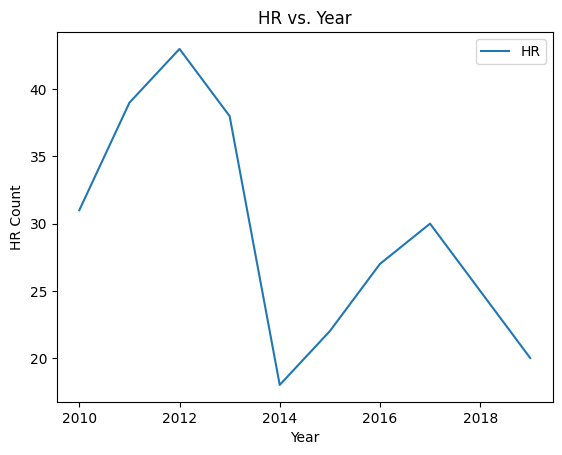

In [59]:
print(f"{df}\n")

df.plot(kind="line", x="yearID", y="HR")
plt.title("HR vs. Year")
plt.xlabel("Year")
plt.ylabel("HR Count")
plt.show()

In [61]:
data = {
    'yearID': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007],
    'H': [147, 156, 149, 133, 135, 12, 99, 94],
    'BB': [117, 177, 198, 148, 232, 9, 115, 132]
}

df = pd.DataFrame(data)
print(df)

   yearID    H   BB
0    2000  147  117
1    2001  156  177
2    2002  149  198
3    2003  133  148
4    2004  135  232
5    2005   12    9
6    2006   99  115
7    2007   94  132


   yearID    H   BB
0    2000  147  117
1    2001  156  177
2    2002  149  198
3    2003  133  148
4    2004  135  232
5    2005   12    9
6    2006   99  115
7    2007   94  132



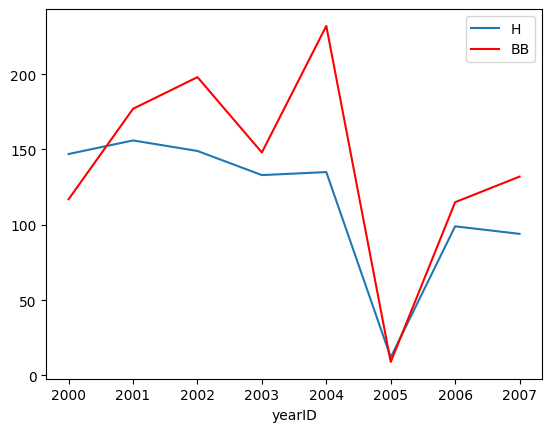

In [ ]:
print('{df}\n')

ax = plt.gca()

df.plot(kind='line',x='yearID',y='H',ax=ax)
df.plot(kind='line',x='yearID',y='BB', color='red', ax=ax)
plt.show()

## One-Hot Encoding

In [87]:
df = pd.DataFrame(
    {
        "lgID": ["AL", "NL", "AL", "NL"],
        "teamID": ["BOS", "PIT", "BOS", "PIT"]
    },
    index=["bettsmo01", "martest01", "pedrodu01", "polangr01"]
)
print(df.dtypes)

lgID      object
teamID    object
dtype: object


In [88]:
print(f"Original: \n{df}")

converted_df = pd.get_dummies(df).astype(int)
print(f"converted df columns: {converted_df.columns}\n")

print(f"Teams: \n{converted_df[['teamID_BOS','teamID_PIT']]}\n")
print(f"lgIDs: \n{converted_df[['lgID_AL','lgID_NL']]}\n")
							   
print(f"Converted_df: \n{converted_df}")

Original: 
          lgID teamID
bettsmo01   AL    BOS
martest01   NL    PIT
pedrodu01   AL    BOS
polangr01   NL    PIT
converted df columns: Index(['lgID_AL', 'lgID_NL', 'teamID_BOS', 'teamID_PIT'], dtype='object')

Teams: 
           teamID_BOS  teamID_PIT
bettsmo01           1           0
martest01           0           1
pedrodu01           1           0
polangr01           0           1

lgIDs: 
           lgID_AL  lgID_NL
bettsmo01        1        0
martest01        0        1
pedrodu01        1        0
polangr01        0        1

Converted_df: 
           lgID_AL  lgID_NL  teamID_BOS  teamID_PIT
bettsmo01        1        0           1           0
martest01        0        1           0           1
pedrodu01        1        0           1           0
polangr01        0        1           0           1


In [89]:
#Convert the above one-hot encoded DataFrame into numpy array

print(converted_df.dtypes)
print(f"Before conversion: \n{converted_df}\n")
numpy_array = converted_df.to_numpy()
print(numpy_array)

lgID_AL       int64
lgID_NL       int64
teamID_BOS    int64
teamID_PIT    int64
dtype: object
Before conversion: 
           lgID_AL  lgID_NL  teamID_BOS  teamID_PIT
bettsmo01        1        0           1           0
martest01        0        1           0           1
pedrodu01        1        0           1           0
polangr01        0        1           0           1

[[1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]]
